<a href="https://colab.research.google.com/github/PeiYauWeng/Data_sampling_for_compression/blob/main/Visualization_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pywt
import pywt.data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

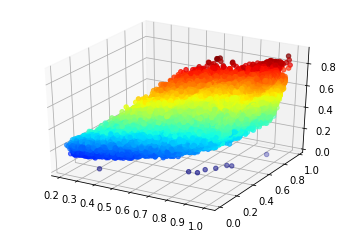

In [ ]:
image = img.imread('drive/MyDrive/Colab Notebooks/lena.png')
fig_o = plt.figure()
ax = fig_o.gca(projection='3d')
ax.scatter(image[:,:,0], image[:,:,1], image[:,:,2], c=image[:,:,2], cmap='jet')

In [21]:
def imageDWT(image, wtType, level):
  if(len(image.shape)>2):
    wtcoefficient = list()
    for i in range(image.shape[2]):
      tmp = pywt.wavedec2(image[:,:,i], wtType, level=level)[0]
      wtcoefficient.append(tmp)
    wtcoefficient = np.dstack(wtcoefficient)
    wtcoefficient = wtcoefficient*((np.max(image)-np.min(image))/(np.max(wtcoefficient)-np.min(wtcoefficient)))
    wtcoefficient = wtcoefficient-(np.min(wtcoefficient)-np.min(image))
  else:
    wtcoefficient = pywt.wavedec2(image, wtType, level=level)[0]
    #wtcoefficient = wtcoefficient*(np.max(image)/np.max(wtcoefficient))
    wtcoefficient = wtcoefficient*((np.max(image)-np.min(image))/(np.max(wtcoefficient)-np.min(wtcoefficient)))
    wtcoefficient = wtcoefficient-(np.min(wtcoefficient)-np.min(image))
  return wtcoefficient

In [22]:
#image= rgbTOgray(image)
DWTimage = imageDWT(image, 'haar', 3)
print(DWTimage.shape)

(64, 64, 3)


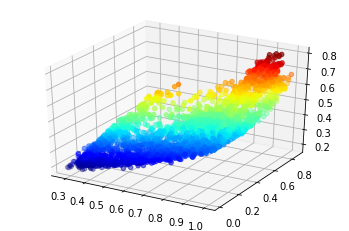

In [ ]:
fig_trans = plt.figure()
ax = fig_trans.gca(projection='3d')
ax.scatter(DWTimage[:,:,0], DWTimage[:,:,1], DWTimage[:,:,2],
                c=DWTimage[:,:,2], cmap='jet')

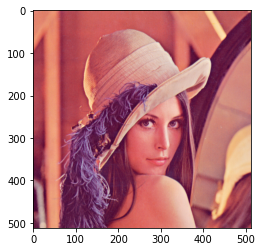

In [ ]:
plt.imshow(image)

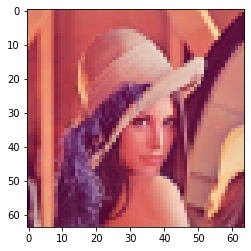

In [ ]:
plt.imshow(DWTimage)

In [2]:
def rgbTOgray(image):
  return np.dot(image, np.array([0.299, 0.587, 0.114]))

In [5]:
def wtTransformation_3d(image, wtType, format):
  image = np.array(image)
  if(format is 'xyz'):
    store = list()
    for i in range(image.shape[2]):
      store.append(image[:,:,i][np.newaxis,:])
    image = np.vstack(store)
  trans_image = pywt.dwtn(image, wtType)
  trans_image = np.array(list(trans_image.values()))[0]
  trans_image = trans_image*((np.max(image)-np.min(image))/(np.max(trans_image)-np.min(trans_image)))
  trans_image = trans_image-(np.min(trans_image)-np.min(image))
  return trans_image

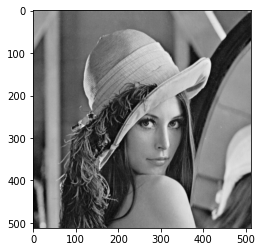

In [ ]:
image = img.imread('drive/MyDrive/Colab Notebooks/lena.png')
image= rgbTOgray(image)
plt.imshow(image, cmap = 'gray')

(2, 256, 256)
(256, 256)


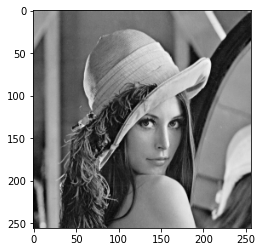

In [7]:
wavelet_image = image*np.array([0.299, 0.587, 0.114])
wavelet_image = wtTransformation_3d(wavelet_image, 'haar', 'xyz')
print(wavelet_image.shape)
print(np.sum(wavelet_image, axis=0).shape)
plt.imshow(np.sum(wavelet_image, axis=0), cmap = 'gray')

In [8]:
def sampling_method(data, level, type):
  shapelist = data.shape
  dilen = len(shapelist)
  level = int(2**level)
  for i in range(dilen):
    if(type is 'max'):
      data = np.max(np.split(data, int(shapelist[dilen-1-i]/level), axis=(dilen-1)), axis=dilen)
    if(type is 'min'):
      data = np.min(np.split(data, int(shapelist[dilen-1-i]/level), axis=(dilen-1)), axis=dilen)
  return data

In [12]:
max_list = list()
for i in range(image.shape[2]):
  max_sampling = sampling_method(image[:,:,i], 3, 'max')
  max_list.append(max_sampling)
max_sampling = np.dstack(max_list)
print(max_sampling.shape)

(64, 64, 3)


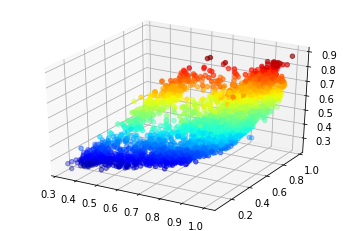

In [24]:
fig_max = plt.figure()
ax = fig_max.gca(projection='3d')
ax.scatter(max_sampling[:,:,0], max_sampling[:,:,1], max_sampling[:,:,2],
                c=max_sampling[:,:,2], cmap='jet')

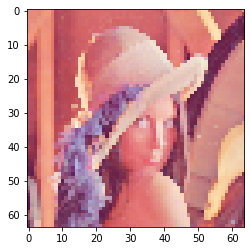

In [13]:
plt.imshow(max_sampling)

In [14]:
min_list = list()
for i in range(image.shape[2]):
  min_sampling = sampling_method(image[:,:,i], 3, 'min')
  min_list.append(min_sampling)
min_sampling = np.dstack(min_list)
print(min_sampling.shape)

(64, 64, 3)


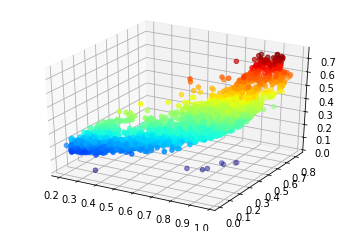

In [25]:
fig_min = plt.figure()
ax = fig_min.gca(projection='3d')
ax.scatter(min_sampling[:,:,0], min_sampling[:,:,1], min_sampling[:,:,2],
                c=min_sampling[:,:,2], cmap='jet')

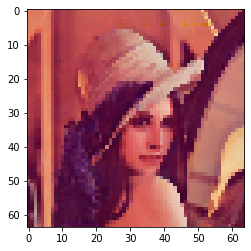

In [15]:
plt.imshow(min_sampling)

In [18]:
def random_map(position, shape, level):
  step = 1
  num_dimension = len(shape)
  current_size = shape[position]
  reshape_map = np.ones(num_dimension)
  reshape_map[position] = current_size/level
  tmp = np.arange(0, current_size, level)+np.random.randint(level, size=int(current_size/level))
  tmp = tmp.reshape(reshape_map.astype(np.int8))
  for i in range((num_dimension-1), position, -1):
    step *= shape[i] 
  tmp *= step
  return tmp

def random_sampling_method(data, level):
  level = 2**level  
  for i in range(len(data.shape)):
    if(i == 0):
      map = random_map(i, data.shape, level)
    else:
      map = map+random_map(i, data.shape, level)
  data = data.flatten()[map]
  return data

In [19]:
random_list = list()
for i in range(image.shape[2]):
  random_sampling = random_sampling_method(image[:,:,i], 3)
  random_list.append(random_sampling)
random_sampling = np.dstack(random_list)
print(random_sampling.shape)

(64, 64, 3)


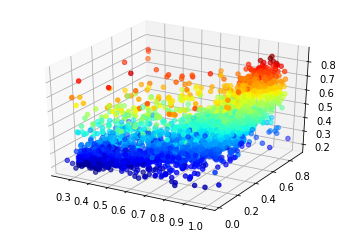

In [26]:
fig_random = plt.figure()
ax = fig_random.gca(projection='3d')
ax.scatter(random_sampling[:,:,0], random_sampling[:,:,1], random_sampling[:,:,2],
                c=random_sampling[:,:,2], cmap='jet')

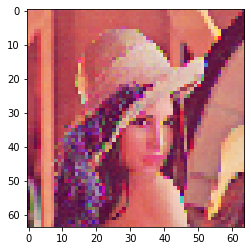

In [20]:
plt.imshow(random_sampling)